# CMSC320 Fall 2022 Final Project- Riya Kukadia and Amartya Patel

In [1]:
# Topic: How is the Potability of Water Determined?

# Contributors: Riya Kukadia (UID: 117260557) and Amartya Patel (UID: 117183986)

# Topic Introduction

It is undoubtedly true that access to safe and reliable water is considered as a basic human right. Subsequently, it is extremely essential to have some knowledge about the water we use (especially for consumption) as it can lead to a plethora of health problems! 

Next, in the same vein, we use this insight as motivation to dive deeper and analyze the quality of water (primarily the notion of potability) using different chemical properties (such as pH value, Hardness, Sulfates etc.), thus inspecting the quality of water across different samples.


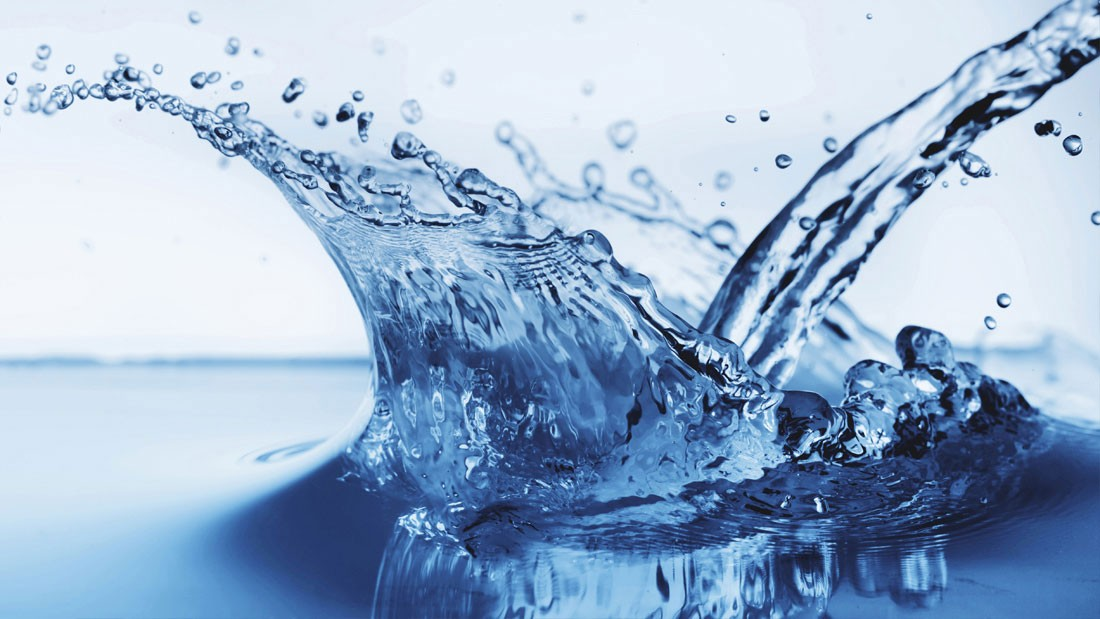

Picture Taken From: https://www.prominent.com/en/Applications/Applications/Water-Treatment-and-Water-Disinfection/Water-Treatment-and-Water-Disinfection.html

#  Now Getting Started!

First and foremost, we simply import necessary libraries and tools, that we might/will need for the completion of this project.

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import sys
import io

# Step 1: Data Collection/Curation + Parsing (if necessary)

We have obtained this dataset from https://www.kaggle.com/, and have provided the relevant link down below.

Link: https://www.kaggle.com/datasets/adityakadiwal/water-potability

Explaining our Dataset:

The following dataset provides a vivid description of the chemical properties of water (for that sample). These different chemical properties (that is the columns/attributes as part of the dataframe) assist in determining the quality of water, particularly the idea of potability (whether or not it is fit for consumption) of that specific water sample.

Detailed Description for each Column/Attribute:

1) ph: pH stands for potential hydrogen, which essentially tells us the potential of hydrogen in liquids (here in the water      sample). It gives an idea into whether the water is acidic (value less than 7), basic (value greater than 7) or neutral (value of 7).

Ideal Value: 6.52 - 6.83 (max limit: 8.5)

2) Hardness: Hardness here revolves around the mineral content in the water, that is, it focuses on the amount of dissolved calcium and magnesium in the water. 

Ideal Value: should not exceed 120-170 mg/L

3) Solids (Total Dissolved Solids): Solids in this case refer to any minerals, salts, metals, cations or anions dissolved in water (that is any matter that is suspended or dissolved in water).

Ideal Value: 500 mg/L (max: 1000 mg/L)

4) Chloramines: Chloramines (group of chloroids and ammonia) are disinfectants used to treat drinking water. 

Ideal Value: Up to 4 mg/L or 4 ppm

5) Sulfate: Sulphates are chemicals that just naturally make their presence in water. A higher level in sulphates can behave like laxative.

Ideal Value: Lower than 500 mg/L

6) Conductivity: Conductivity is a good measure to check for water quality. This is because pure water is a good insulator (not conductor).

Ideal Value: Should not exceed 400 μS/cm

7) Organic_carbon: Organic carbon revolves around the total amount of carbon atoms tied up in the organic compound of the water sample.

Ideal Value: Less than 2 mg/L as TOC for drinking water, and less than 4 mg/L for source water

8) Trihalomethanes:	Total trihalomethanes (TTHM) are a group of disinfection byproducts that form when chlorine compounds that are used to disinfect water react with other naturally occurring chemicals in the water.

Ideal Value: Up to 80 ppm

9) Turbidity: Turbidity basically highlights the physical appearance of the water, that is, the clarity of the water itself. Particles suspended in the water could make the water seem more cloudy looking.

Ideal Value: 5.00 NTU

10) Potability: This simply means whether or not the water is fit for consumption. 

Ideal Value: 0 means not potable and 1 means potable

Size of the Dataset: 3276 (rows), 10 (columns)

Notes:

1) Information about the metrics used:

ppm: parts per million

μg/L: microgram per litre

mg/L: milligram per litre

NTU: Nephelometric Turbidity Units

2) There exist values for water samples where information for certain attributes is blank or NaN, Null etc.

3) Since we are using a ready to use dataset, there is no need to parse the data. 

In [3]:
Water_Potability_Data = pd.read_csv('water_potability.csv', low_memory = False)

# Information on the size of the dataset:
Water_Potability_Data.shape

# Concerned dataset:
Water_Potability_Data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# Step 2: Data Management/Representation

It is unequivocally true that the current state of the dataframe has missing data in several of the columns. 

Subsequently in this step we clean the data in our dataframe, for effective data analysis in the rest of the project.

First we can rename the columns to add the metrics next to each of the properties. Doing so will consequently provide more clarity on the attributes themselves. 

In [4]:
# Renaming the columns for clarity of the metrics:
Water_Potability_Data.columns = ["pH", "Hardness (mg/L)", "Solids (ppm)", "Chloramines (ppm)", "Sulfate (mg/L)", "Conductivity (μS/cm)", "Organic Carbon (ppm)", "Trihalomethanes (μg/L)", "Turbidity (NTU (Nephelometric Turbidity Units))", "Potability"]

Water_Potability_Data.head()

pH  Hardness (mg/L)  Solids (ppm)  Chloramines (ppm)  Sulfate (mg/L)  \
0       NaN       204.890455  20791.318981           7.300212      368.516441   
1  3.716080       129.422921  18630.057858           6.635246             NaN   
2  8.099124       224.236259  19909.541732           9.275884             NaN   
3  8.316766       214.373394  22018.417441           8.059332      356.886136   
4  9.092223       181.101509  17978.986339           6.546600      310.135738   

   Conductivity (μS/cm)  Organic Carbon (ppm)  Trihalomethanes (μg/L)  \
0            564.308654             10.379783               86.990970   
1            592.885359             15.180013               56.329076   
2            418.606213             16.868637               66.420093   
3            363.266516             18.436524              100.341674   
4            398.410813             11.558279               31.997993   

   Turbidity (NTU (Nephelometric Turbidity Units))  Potability  
0                                         2.963135           0  
1                                         4.500656           0  
2                                         3.055934           0  
3                                         4.628771           0  
4                                         4.075075           0

Now, we start the process of cleaning our data! 

We predominantly focus on dealing with missing values in the dataset.

In order to do, we first need to get more information on and around the missing values in the columns.

In [5]:
# To get this information we simply use the "info" function.
Water_Potability_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   pH                                               2785 non-null   float64
 1   Hardness (mg/L)                                  3276 non-null   float64
 2   Solids (ppm)                                     3276 non-null   float64
 3   Chloramines (ppm)                                3276 non-null   float64
 4   Sulfate (mg/L)                                   2495 non-null   float64
 5   Conductivity (μS/cm)                             3276 non-null   float64
 6   Organic Carbon (ppm)                             3276 non-null   float64
 7   Trihalomethanes (μg/L)                           3114 non-null   float64
 8   Turbidity (NTU (Nephelometric Turbidity Units))  3276 non-null   float64
 9   Potability                    

Now given we have our missing information, let's try and get a better understanding of what exactly is missing.

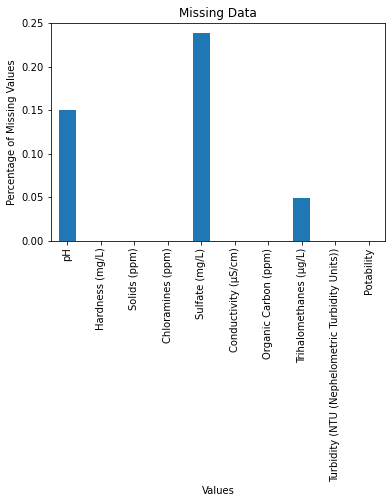

In [6]:
# Use a bar plot to get an idea of the missing data across the attributes. 
Water_Potability_Data.isnull().mean().plot.bar() 

plt.ylabel('Percentage of Missing Values') 

plt.xlabel('Values') 

plt.title('Missing Data');

The following bar plot shows Percentage of Missing Values in each column of our dataframe.

So we can see that we have a lot of missing values in the pH, Sulphate and Trihalomethane columns. 

Given this, we have the following options: 

1) Filling the missing values with the mean of the column. 

2) Padding the missing values as 0s.

However, since these values will help us decide if the water is potable or not, padding the missing data as 0s might skew the results a bit too much. Consequently, filling in NaN values with the mean/median may also cause inaccuracies, so for the purpose of this project, we simply drop all NaN values (rows that have a NaN).

In [7]:
# Drop NaN values and reset the index accordingly.
Water_Potability_Data = Water_Potability_Data.dropna().reset_index()

# New size of the dataset.
Water_Potability_Data.shape

(2011, 11)

In [8]:
# Do not need the old index, we can just drop it 
Water_Potability_Data = Water_Potability_Data.drop(columns = ['index'])

Water_Potability_Data.head()

pH  Hardness (mg/L)  Solids (ppm)  Chloramines (ppm)  \
0   8.316766       214.373394  22018.417441           8.059332   
1   9.092223       181.101509  17978.986339           6.546600   
2   5.584087       188.313324  28748.687739           7.544869   
3  10.223862       248.071735  28749.716544           7.513408   
4   8.635849       203.361523  13672.091764           4.563009   

   Sulfate (mg/L)  Conductivity (μS/cm)  Organic Carbon (ppm)  \
0      356.886136            363.266516             18.436524   
1      310.135738            398.410813             11.558279   
2      326.678363            280.467916              8.399735   
3      393.663396            283.651634             13.789695   
4      303.309771            474.607645             12.363817   

   Trihalomethanes (μg/L)  Turbidity (NTU (Nephelometric Turbidity Units))  \
0              100.341674                                         4.628771   
1               31.997993                                         4.075075   
2               54.917862                                         2.559708   
3               84.603556                                         2.672989   
4               62.798309                                         4.401425   

   Potability  
0           0  
1           0  
2           0  
3           0  
4           0

Having cleaned our data, we can highlight certain statistics such as count, mean, standard deviation etc. across the different chemical properties of the water samples (i.e. the attributes).

In [9]:
# We simply use the "describe" function to do so.
Water_Potability_Data.describe()

pH  Hardness (mg/L)  Solids (ppm)  Chloramines (ppm)  \
count  2011.000000      2011.000000   2011.000000        2011.000000   
mean      7.085990       195.968072  21917.441374           7.134338   
std       1.573337        32.635085   8642.239815           1.584820   
min       0.227499        73.492234    320.942611           1.390871   
25%       6.089723       176.744938  15615.665390           6.138895   
50%       7.027297       197.191839  20933.512750           7.143907   
75%       8.052969       216.441070  27182.587067           8.109726   
max      14.000000       317.338124  56488.672413          13.127000   

       Sulfate (mg/L)  Conductivity (μS/cm)  Organic Carbon (ppm)  \
count     2011.000000           2011.000000           2011.000000   
mean       333.224672            426.526409             14.357709   
std         41.205172             80.712572              3.324959   
min        129.000000            201.619737              2.200000   
25%        307.632511            366.680307             12.124105   
50%        332.232177            423.455906             14.322019   
75%        359.330555            482.373169             16.683049   
max        481.030642            753.342620             27.006707   

       Trihalomethanes (μg/L)  \
count             2011.000000   
mean                66.400859   
std                 16.077109   
min                  8.577013   
25%                 55.952664   
50%                 66.542198   
75%                 77.291925   
max                124.000000   

       Turbidity (NTU (Nephelometric Turbidity Units))   Potability  
count                                      2011.000000  2011.000000  
mean                                          3.969729     0.403282  
std                                           0.780346     0.490678  
min                                           1.450000     0.000000  
25%                                           3.442915     0.000000  
50%                                           3.968177     0.000000  
75%                                           4.514175     1.000000  
max                                           6.494749     1.000000

# Step 3: Exploratory Data Analysis

In this part, we hope to explore different trends in our data through visualization!

Since we are interested purely in the notion of potability, we will centralize that in our data exploration.

Now given this, we can compare each chemical property with each other, to particularly highlight whether or not certain values of the concerned chemical properties unequivocally correlate to potable or unpotable water.

First, we begin with pH values. We can compare pH values with every other chemical property of the samples, to see if certain pH values (and values of another property) correspond to potability.

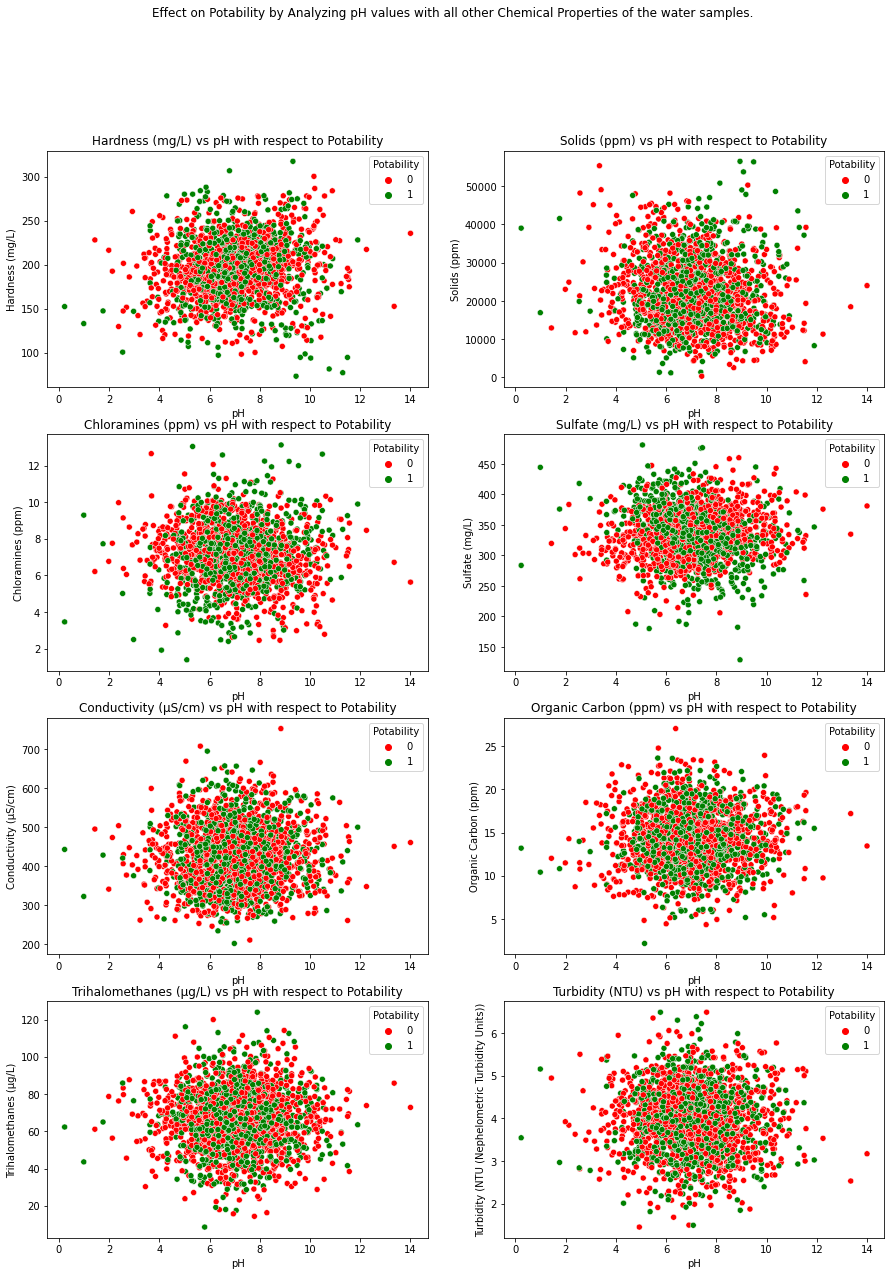

In [10]:
# Analyzing pH values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing pH values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("Hardness (mg/L) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Solids (ppm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Chloramines (ppm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Sulfate (mg/L) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs pH with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'pH', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs pH with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing pH values with all other chemical properties of the water samples.

Next, we do the same but with Hardness.

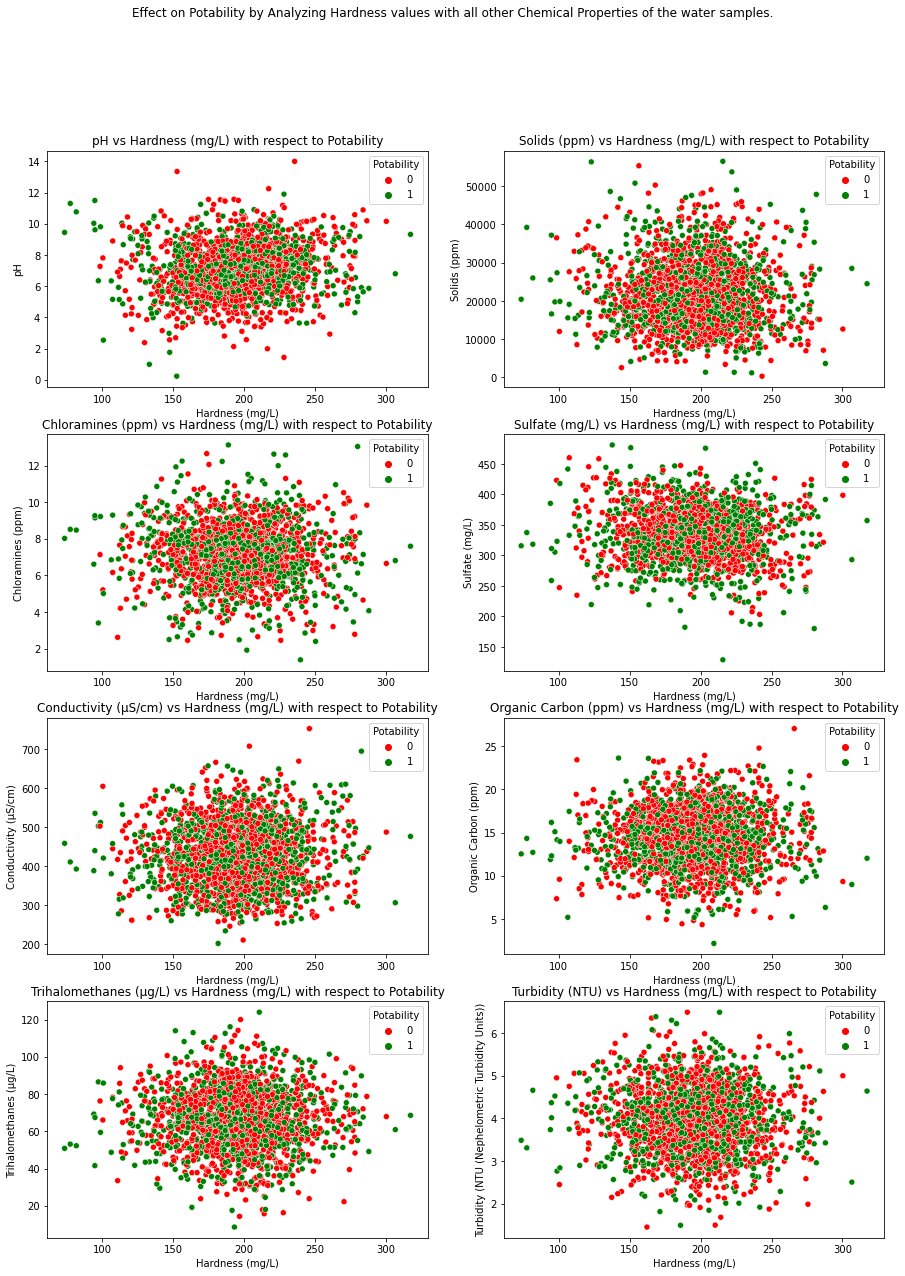

In [11]:
# Analyzing Hardness values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Hardness values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Solids (ppm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Chloramines (ppm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Sulfate (mg/L) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Hardness (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Hardness (mg/L)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Hardness (mg/L) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Hardness values with all other chemical properties of the water samples.

Next, we do the same but with Solids.

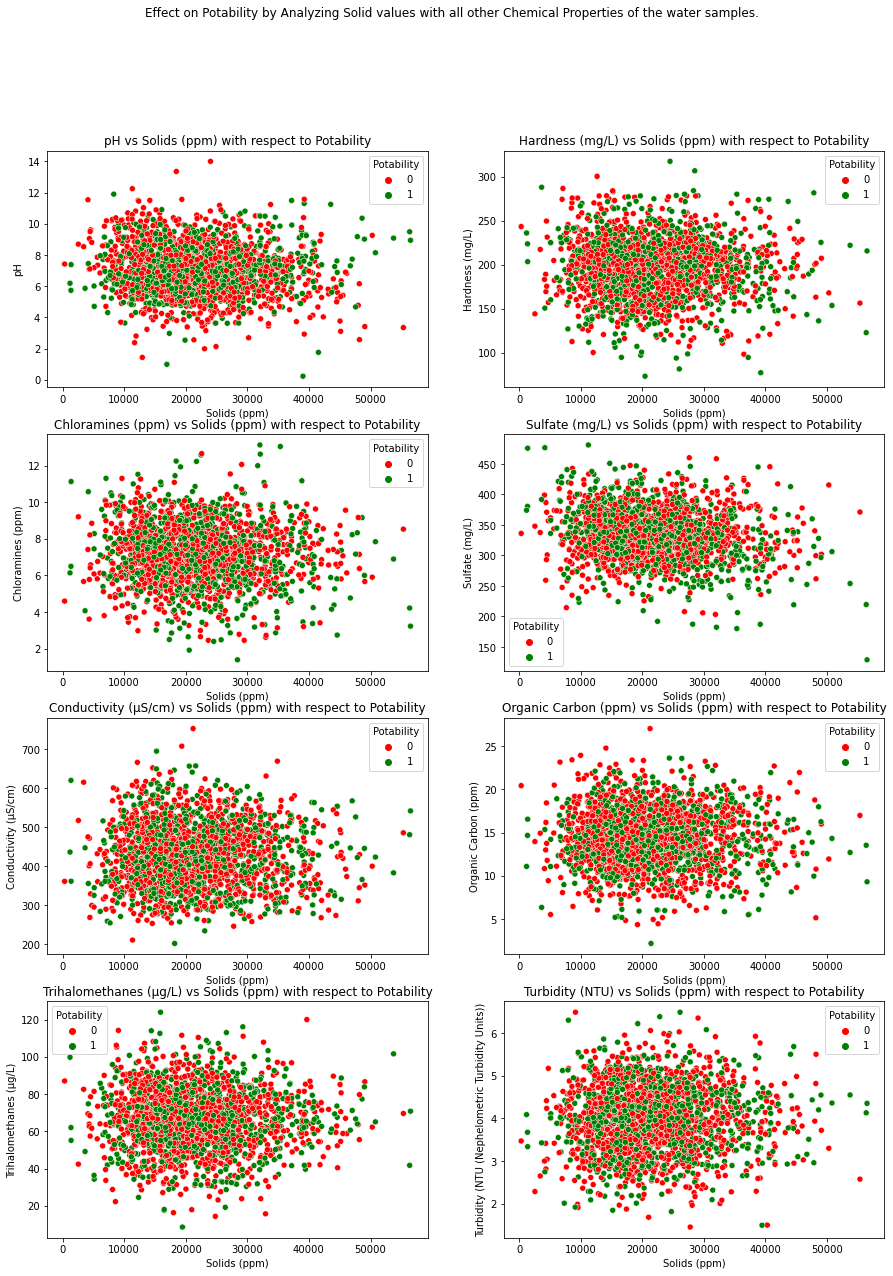

In [12]:
# Analyzing Solid values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Solid values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Chloramines (ppm) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Sulfate (mg/L) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Solids (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Solids (ppm)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Solids (ppm) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Solids values with all other chemical properties of the water samples.

Similarly we continue this with the next property, Chloramines.

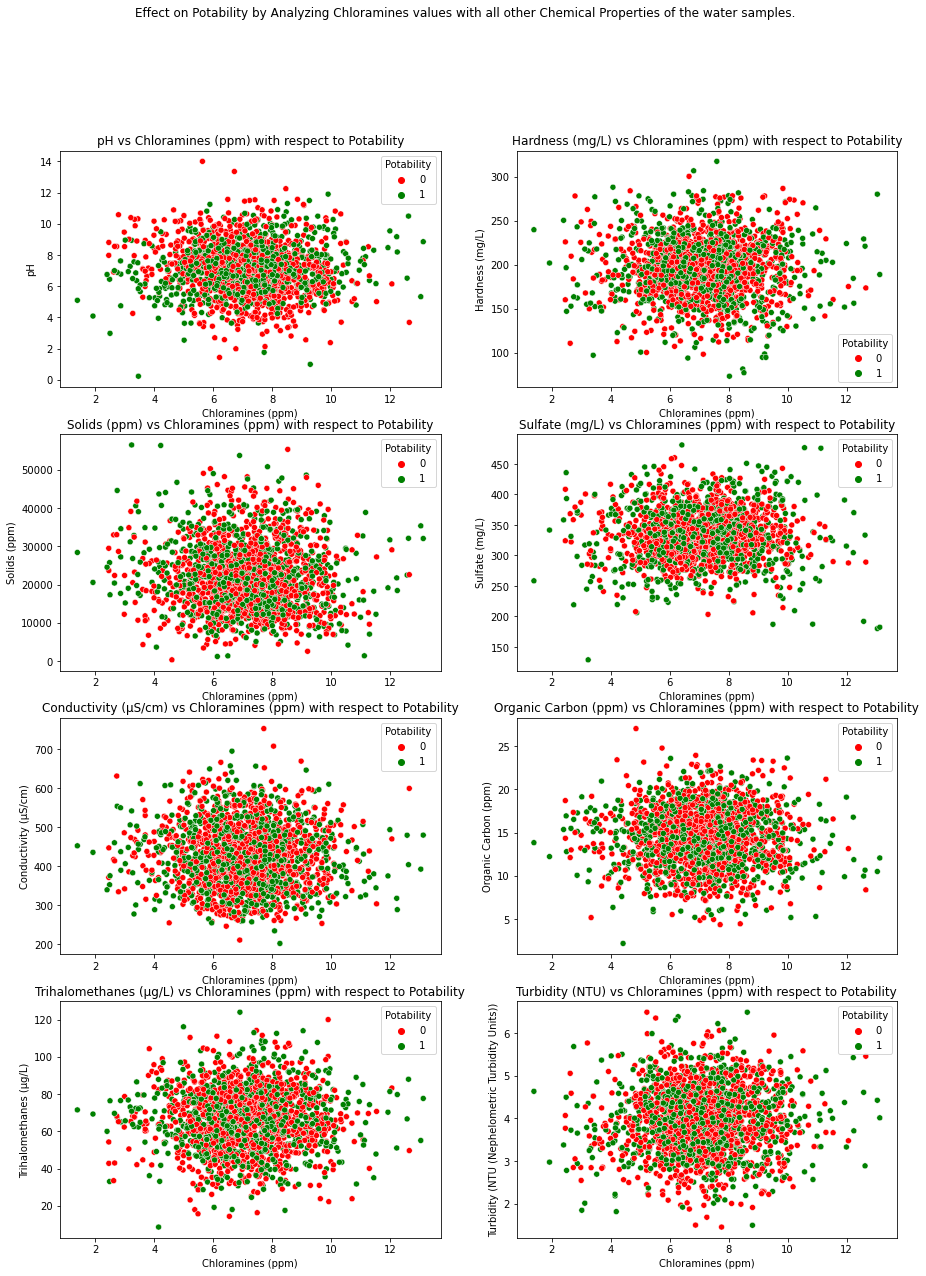

In [13]:
# Analyzing Chloramines values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Chloramines values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Chloramines (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Chloramines (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Solids (ppm) vs Chloramines (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Sulfate (mg/L) vs Chloramines (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs Chloramines (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs Chloramines (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Chloramines (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Chloramines (ppm)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Chloramines (ppm) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Chloramines values with all other chemical properties of the water samples.

Similarly we continue this with the next property, Sulfates.

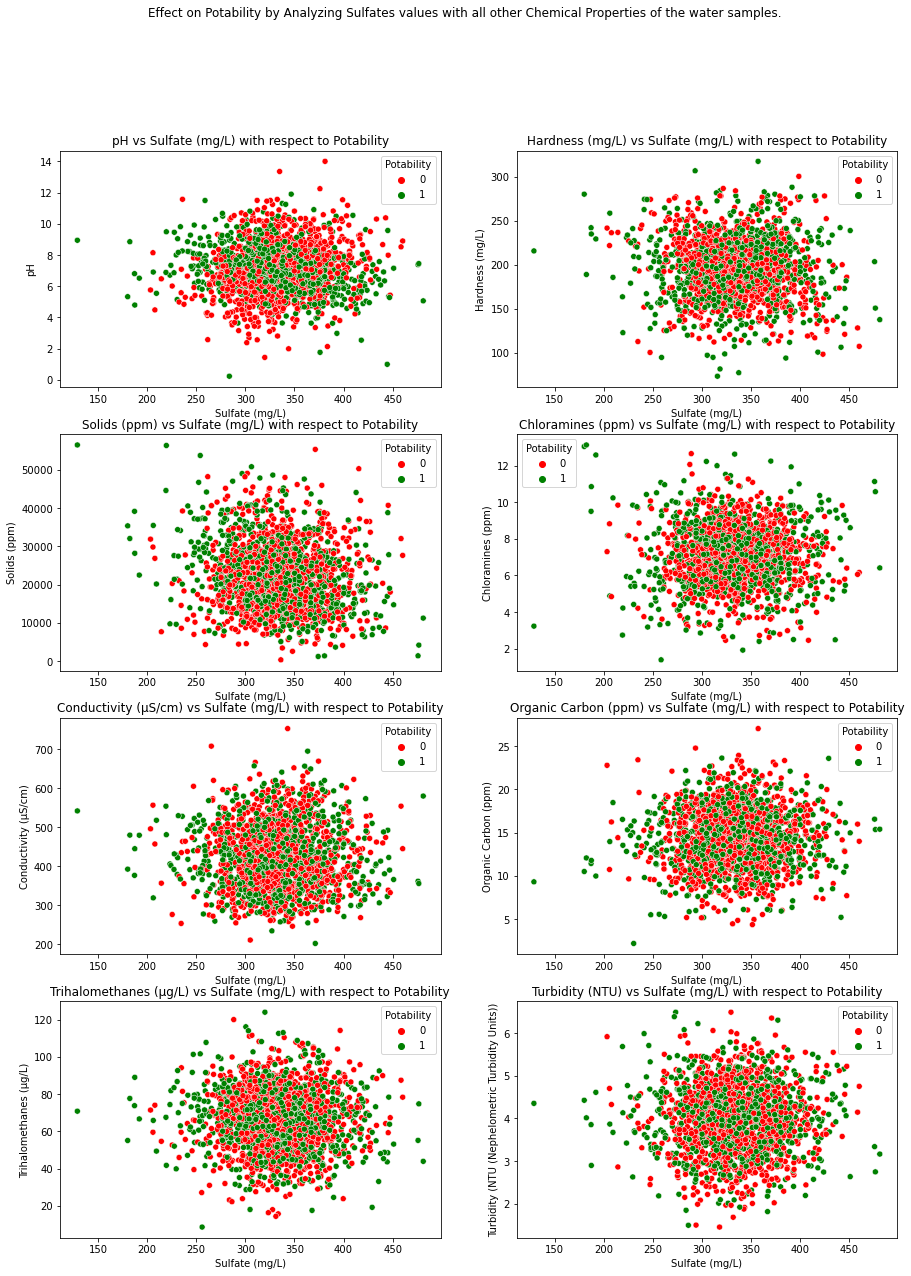

In [14]:
# Analyzing Sulfates values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Sulfates values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Sulfate (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Sulfate (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Solids (ppm) vs Sulfate (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Chloramines (ppm) vs Sulfate (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Conductivity (μS/cm) vs Sulfate (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs Sulfate (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Sulfate (mg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Sulfate (mg/L)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Sulfate (mg/L) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Sulfate values with all other chemical properties of the water samples.

In the same vein, we continue to create scatter plots but now with reference to Conductivity values.

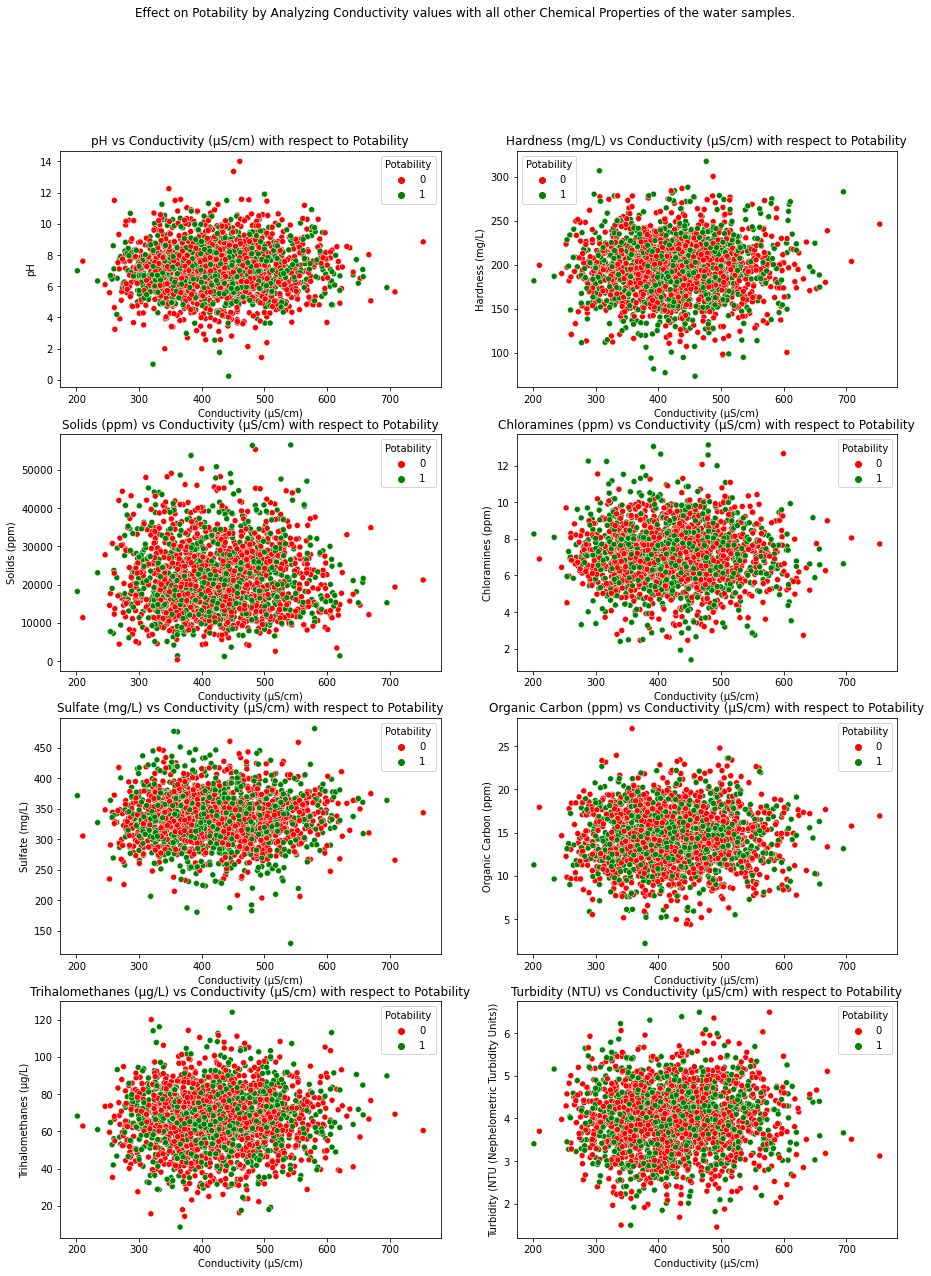

In [15]:
# Analyzing Conductivity values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Conductivity values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Conductivity (μS/cm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Conductivity (μS/cm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Solids (ppm) vs Conductivity (μS/cm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Chloramines (ppm) vs Conductivity (μS/cm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Sulfate (mg/L) vs Conductivity (μS/cm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Organic Carbon (ppm) vs Conductivity (μS/cm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Conductivity (μS/cm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Conductivity (μS/cm)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Conductivity (μS/cm) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Conductivity values with all other chemical properties of the water samples.

Next, we do the same but with Organic Carbon as the main parameter.

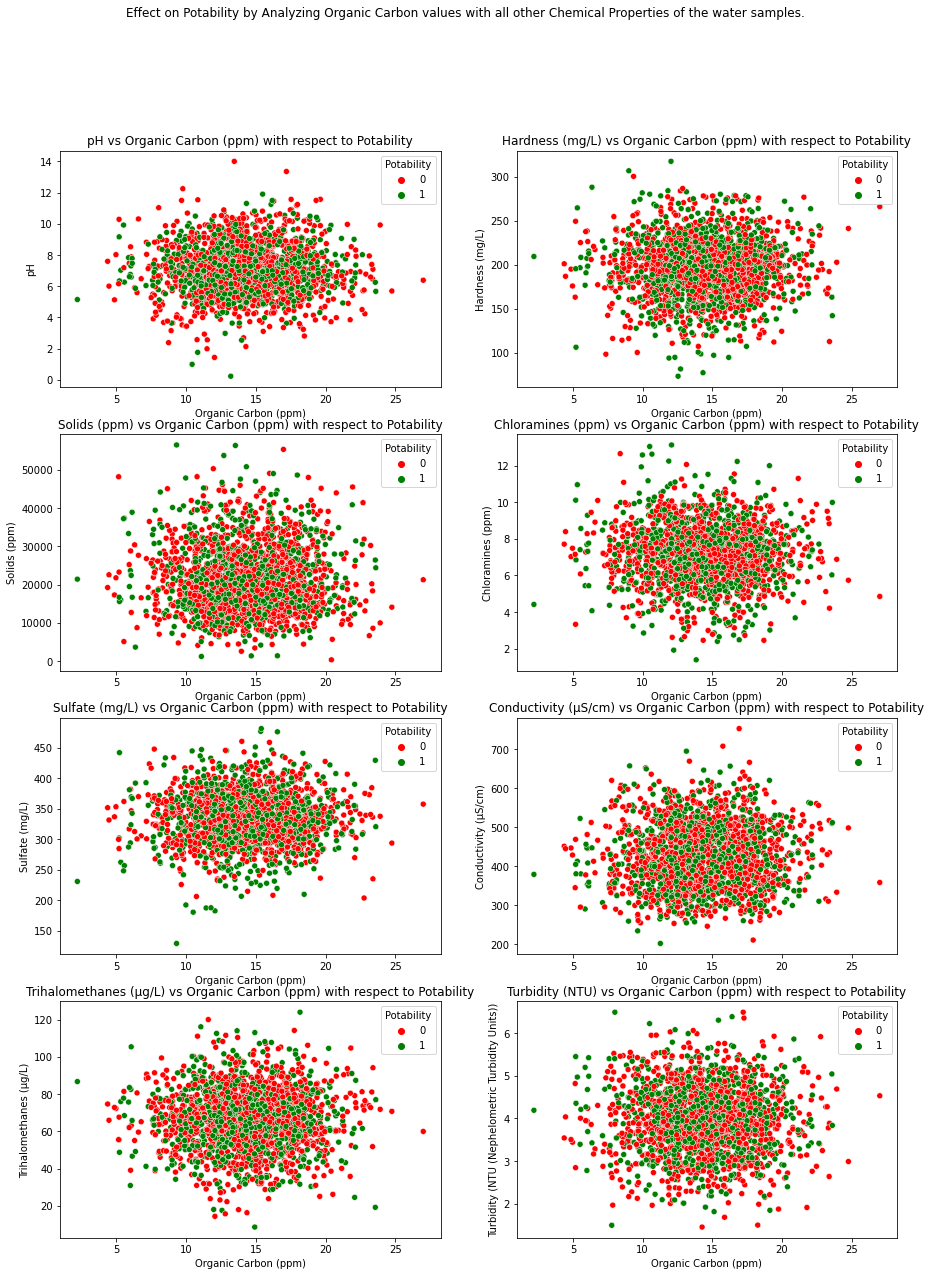

In [16]:
# Analyzing Organic Carbon values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Organic Carbon values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Organic Carbon (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Organic Carbon (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Solids (ppm) vs Organic Carbon (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Chloramines (ppm) vs Organic Carbon (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Sulfate (mg/L) vs Organic Carbon (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Conductivity (μS/cm) vs Organic Carbon (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Trihalomethanes (μg/L) vs Organic Carbon (ppm) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Organic Carbon (ppm)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Organic Carbon (ppm) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Organic Carbon values with all other chemical properties of the water samples.

Next, we do the same but with Trihalomethanes as the main parameter.

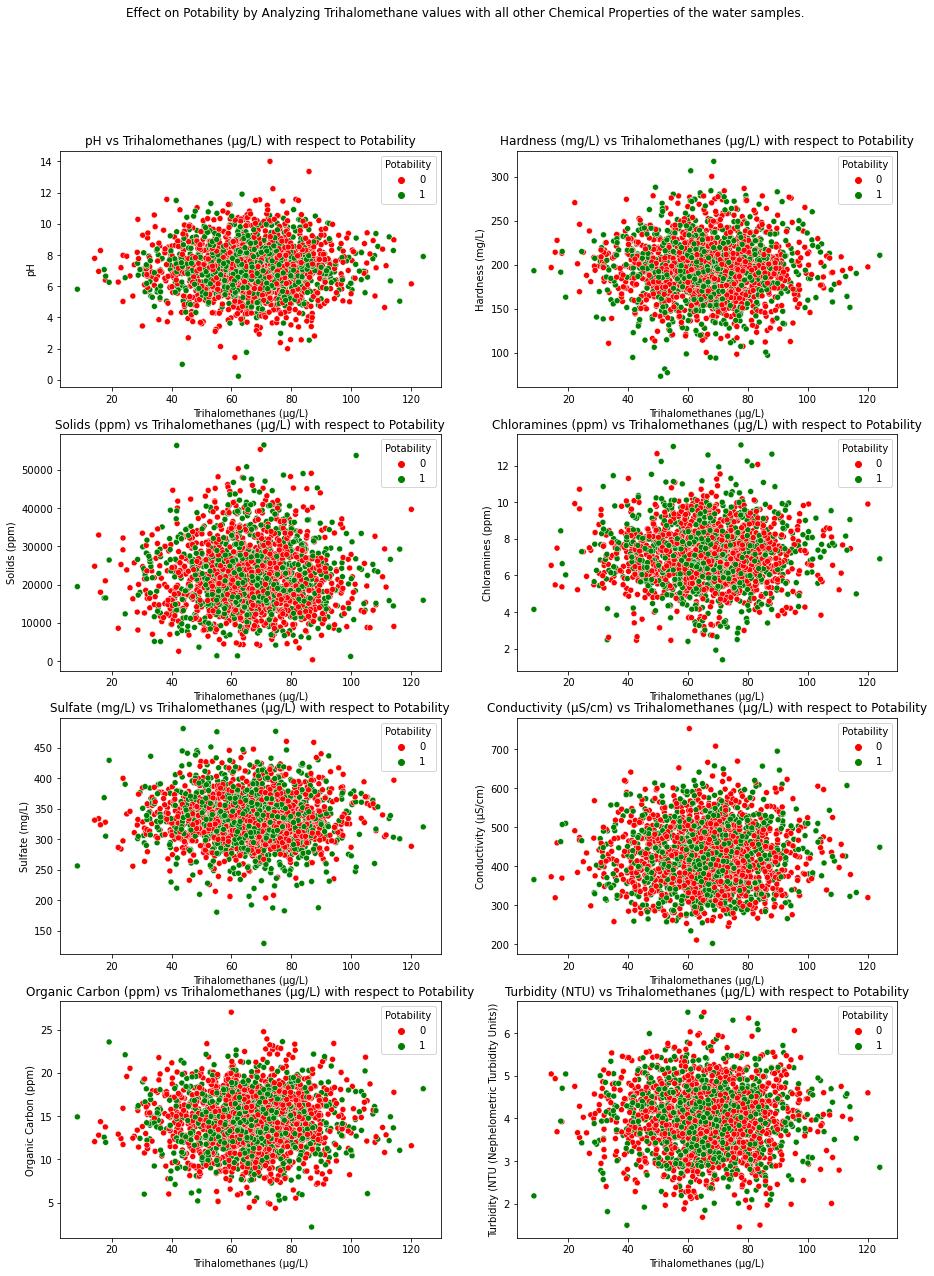

In [17]:
# Analyzing Trihalomethane values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Trihalomethane values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Trihalomethanes (μg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Trihalomethanes (μg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Solids (ppm) vs Trihalomethanes (μg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Chloramines (ppm) vs Trihalomethanes (μg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Sulfate (mg/L) vs Trihalomethanes (μg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Conductivity (μS/cm) vs Trihalomethanes (μg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Organic Carbon (ppm) vs Trihalomethanes (μg/L) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Trihalomethanes (μg/L)', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Turbidity (NTU) vs Trihalomethanes (μg/L) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Trihalomethane values with all other chemical properties of the water samples.

Next, we do the same but with Turbidity as the main parameter.

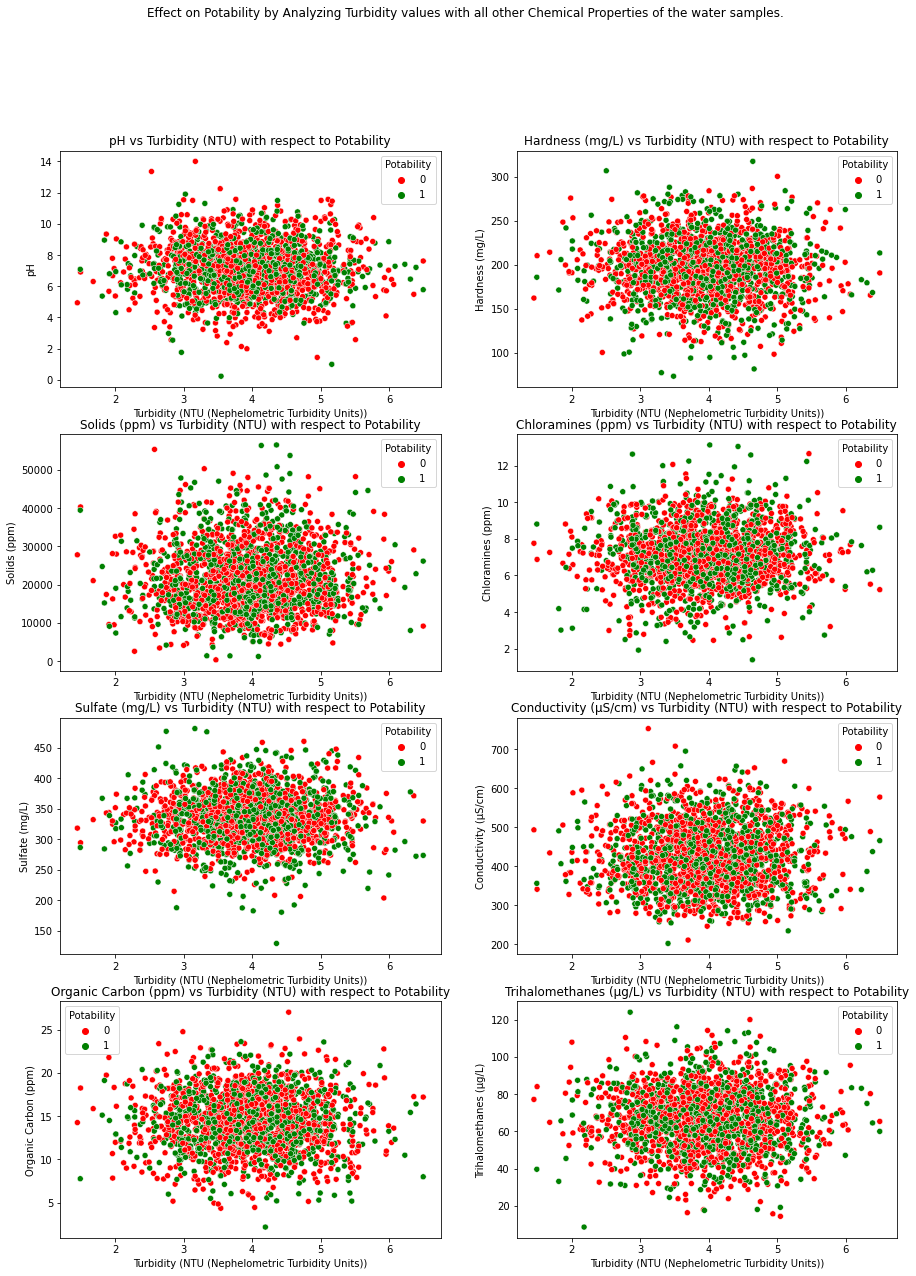

In [18]:
# Analyzing Turbidity values through the sample.

# Here we use subplots, because we can simply eyeball and note any trends that we can see.
fig, axes = plt.subplots(4, 2, figsize = (15, 20))

# Title the graph for clarity.
fig.suptitle('Effect on Potability by Analyzing Turbidity values with all other Chemical Properties of the water samples.')


# Here are some notes that might help in understanding the subplots (using seaborn) more comprehensively:

# data = dataframe to use.
# x = column that contributes to the x-axis in the dataframe.
# y = column that contributes to the y-axis in the dataframe.
# hue= differentiates based on that attribute.
# palatte = selected colors to differentiate on.
# ax = concerned subplot.

# Additonally = scatterplot indicates a scatter plot, and set_title just like above sets the title (of the subplot).

# We hue on potability because it is what we are most interested in.

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'pH', hue = "Potability", palette = ["red", "green"], ax = axes[0, 0])
axes[0, 0].set_title("pH vs Turbidity (NTU) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'Hardness (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[0, 1])
axes[0, 1].set_title("Hardness (mg/L) vs Turbidity (NTU) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'Solids (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 0])
axes[1, 0].set_title("Solids (ppm) vs Turbidity (NTU) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'Chloramines (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[1, 1])
axes[1, 1].set_title("Chloramines (ppm) vs Turbidity (NTU) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'Sulfate (mg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 0])
axes[2, 0].set_title("Sulfate (mg/L) vs Turbidity (NTU) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'Conductivity (μS/cm)', hue = "Potability", palette = ["red", "green"], ax = axes[2, 1])
axes[2, 1].set_title("Conductivity (μS/cm) vs Turbidity (NTU) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'Organic Carbon (ppm)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 0])
axes[3, 0].set_title("Organic Carbon (ppm) vs Turbidity (NTU) with respect to Potability")

sns.scatterplot(data = Water_Potability_Data, x = 'Turbidity (NTU (Nephelometric Turbidity Units))', y = 'Trihalomethanes (μg/L)', hue = "Potability", palette = ["red", "green"], ax = axes[3, 1])
axes[3, 1].set_title("Trihalomethanes (μg/L) vs Turbidity (NTU) with respect to Potability")

plt.show()

As mentioned above the following subplots primarily revolve around the effect on Potability by analyzing Turbidity values with all other chemical properties of the water samples.

**All in all, what do these plots really tell us?**

Each of these scatter plots above, help us to shed more light on whether or not a particular combination of chemical properties relate to potable water or not. Deeply analyzing each of the graphs, for each combination we can possibly narrow down a range of values between the 2 chemical properties (on the x-y axis respectively) to highlight water potability, looking solely at the green dots only.

However, this would not be a viable solution or idea. This is because if you notice, all the plots above are centrally clustered with a mixture of red (unpotable) and green (potable) dots. Subsequently, this does not concretely tell us whether those selected ranges definitely correlate to potable water (because there exist several other red points(unpotable) in that range). 


Irrespective of the above conclusion, one universal thing we can be seen in each of these scatter plots. We see a greater number of red dots as compared to the number of green dots. This probably suggests that we encounter more samples of unpotable water.

However, lets confirm this and see how many samples of potable vs unpotable water we have.

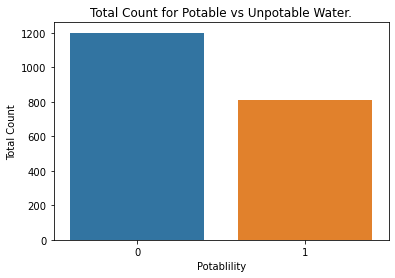

In [19]:
# We simply use a Countplot on the 'Potability' column to tell us how many samples of potable/unpotable water samples we have.

sns.countplot(x = Water_Potability_Data['Potability'])
plt.title('Total Count for Potable vs Unpotable Water.')
plt.xlabel('Potablility')
plt.ylabel('Total Count')

# Note: 0 => Not Potable Water; 1 => Potable Water

plt.show()

This confirms our probable suggestion above, that we indeed have more samples of unpotable water (as compared to potable water samples).

While there might not be any correlation between the chemical properties, lets drill down further to see if any single chemical property of the water samples have any direct correlation with water potability.

Let's visualize which values are different for potable vs unpotable water using box plots, that is, which variables among the ones we have affect the potability of water.

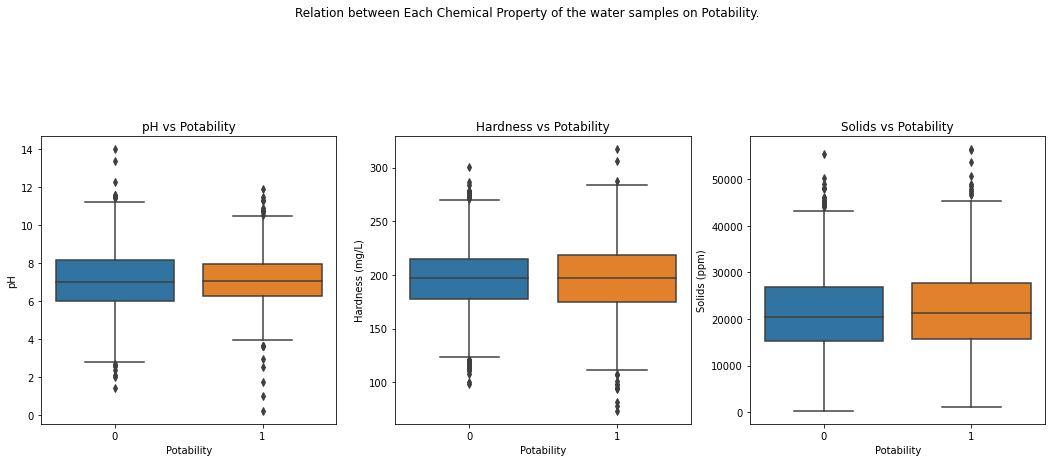

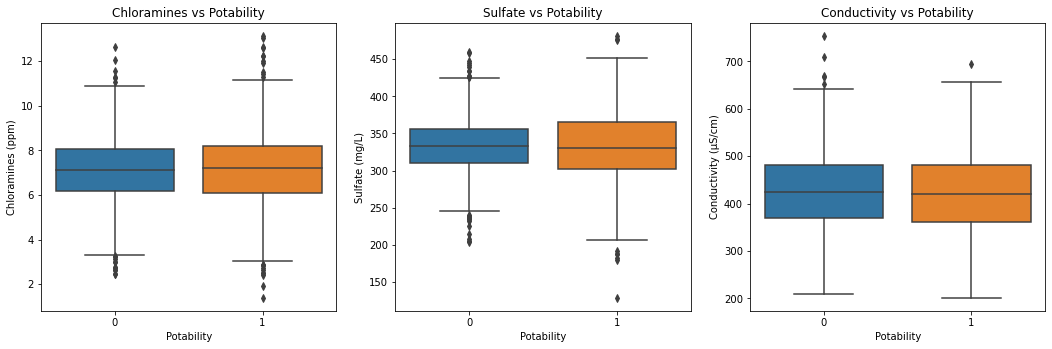

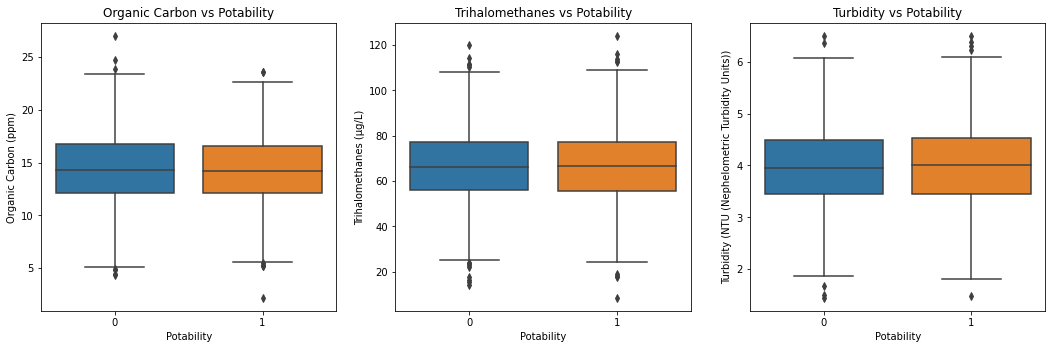

In [20]:
# We follow a similar procedure just like the above scatter plots! However, this time we use a different type of plot, i.e., 
# box plots to see if we can explore any data trends in our set.

plt.figure(figsize = (18, 18))
plt.suptitle('Relation between Each Chemical Property of the water samples on Potability.')

plt.subplot(3, 3, 1)
sns.boxplot(x = 'Potability', y = 'pH', data = Water_Potability_Data).set(title = 'pH vs Potability')

plt.subplot(3, 3, 2)
sns.boxplot(x = 'Potability', y = 'Hardness (mg/L)', data = Water_Potability_Data).set(title = 'Hardness vs Potability')

plt.subplot(3, 3, 3)
sns.boxplot(x = 'Potability', y = 'Solids (ppm)', data = Water_Potability_Data).set(title = 'Solids vs Potability')

plt.figure(figsize = (18, 18))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Potability', y = 'Chloramines (ppm)', data = Water_Potability_Data).set(title = 'Chloramines vs Potability')

plt.subplot(3, 3, 2)
sns.boxplot(x = 'Potability', y = 'Sulfate (mg/L)', data = Water_Potability_Data).set(title = 'Sulfate vs Potability')

plt.subplot(3, 3, 3)
sns.boxplot(x = 'Potability', y = 'Conductivity (μS/cm)', data = Water_Potability_Data).set(title = 'Conductivity vs Potability')

plt.figure(figsize = (18, 18))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Potability', y = 'Organic Carbon (ppm)', data = Water_Potability_Data).set(title = 'Organic Carbon vs Potability')

plt.subplot(3, 3, 2)
sns.boxplot(x = 'Potability', y = 'Trihalomethanes (μg/L)', data = Water_Potability_Data).set(title = 'Trihalomethanes vs Potability')

plt.subplot(3, 3, 3)
sns.boxplot(x = 'Potability', y = 'Turbidity (NTU (Nephelometric Turbidity Units))', data = Water_Potability_Data).set(title = 'Turbidity vs Potability')

plt.show()

**What can we now say?**

Given our subplots above, we can see that there are slight (but not significant) differences between the pH, Sulfate, Hardness and Chloramine values of potable vs unpotable water. Since these differences are insignificant it would consequently not be appropriate to conclude any strong correlation between any of the chemical properties above to the potability of water in our samples.

Lastly, let's create a Heat Plot to better determine any significant or strong correlations between the two.

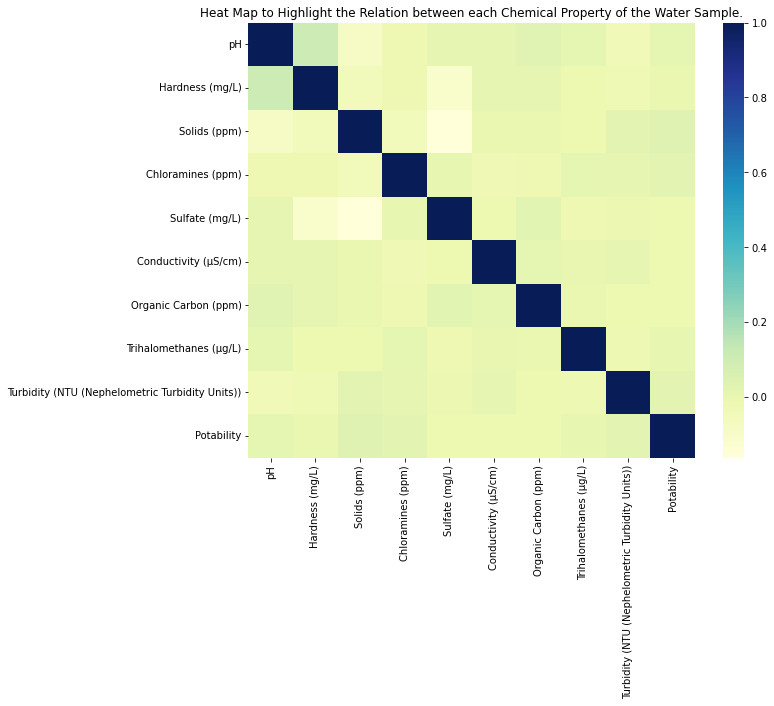

In [21]:
# Similar procedure as above but we use the 'heatmap' as part of seaborn!

fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(Water_Potability_Data.corr(), cmap = "YlGnBu").set(title = 'Heat Map to Highlight the Relation between each Chemical Property of the Water Sample.')

plt.show()

**Still Nothing ?!**

Analyzing the heat plot above, to reiterate we can see that there are no strong or significant relationships between the variables to suggest a possible correlation with potability.

**However...**

It is important to note that in a situation such as this, especially from a chemical perspective, we suggest the idea that not one or two chemical properties relate to potability, but a group (at the same not necessarily all variables) of variables or chemical proerties relate to the notion of the potability for that water sample. Further, highlighting this possible trend might be complicated (especially through visualization) as we suggest an involvement of more than 2 variables (which could also be beyond the scope the class). Lastly, other missing information such as Name or Location of the main source of water for that water sample could have possibly assisted us in making a more conclusive statement, but it is sadly not in our hands. Even merging another relevant dataset (tedious itself in this case) to generalize our samples in any way would not really help, because we are analyzing specific samples itself.

Irrespective, we hope to study our plausible suggestion on and around the involvement of several variables/properties with reference to potability in the next segment of our project!

# Step 4: I) Hypothesis Testing

We now test to see if these chemical properties indeed have a correlation with the potability of water or not!

**Null Hypothesis** - All variables (i.e. chemical properties in the dataset) are not strongly correlated to the potability of water. Essentially, all variables do not have a strong impact of determining whether water is potable or not.

To test our Hypothesis we will use the Spearman Rank Test. 

Spearman’s Rank Correlation measures the strength and direction of association between two ranked variables. It basically gives the measure of monotonicity of the relation between two variables i.e. how well the relationship between two variables could be represented using a monotonic function.

To give more information about the test, the Spearman's correlation coefficient (*rs*) measures the strength and direction of association between the two ranked variables.

Further, the Spearman Correlation Coefficient, *rs*, can take values from +1 to -1. A *rs* of *+1* indicates a *perfect positive association of ranks*, a *rs* of *0* indicates *no association between ranks* and a *rs* of *-1* indicates a *perfect negative association of ranks*. 

All in all, the closer the rs is to zero, the *weaker* the association between the ranks.

For More Information:

=> https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

=> https://www.simplilearn.com/tutorials/statistics-tutorial/spearmans-rank-correlation

In [22]:
# Now we calculate the correlation coefficient (rs) between each available variable with respect to the 'Potability' column.

for feature in Water_Potability_Data.columns:
    
    corr, p_value = scipy.stats.spearmanr(Water_Potability_Data[feature], Water_Potability_Data['Potability'])
    
    print('RS-value for {} is {}'.format(feature, p_value))

RS-value for pH is 0.5297797418282144
RS-value for Hardness (mg/L) is 0.6998145997007005
RS-value for Solids (ppm) is 0.11633127125962607
RS-value for Chloramines (ppm) is 0.3314569572193391
RS-value for Sulfate (mg/L) is 0.6867588303366772
RS-value for Conductivity (μS/cm) is 0.42376258895464713
RS-value for Organic Carbon (ppm) is 0.5298310038190563
RS-value for Trihalomethanes (μg/L) is 0.8685422511859388
RS-value for Turbidity (NTU (Nephelometric Turbidity Units)) is 0.31448141304021615
RS-value for Potability is 0.0


The Spearman Test gives a relatively high p-value for Hardness, Sulfates, Trihalomethanes indicating a somewhat strong correlation between these chemical properties and the subsequent Potability of water.

Therefore, we can accurately assert that even though some variables are correlated to potability, *all* variables are not, so we can *reject* the Null Hypothesis that all variables have a strong impact on the potability of water.

# Step 4: II) Classification

Now, in this section we will attempt to train some classifiers that, given the feature columns, we will determine whether the water is potable or not!

In [23]:
# First, we import the needed tools from sklearn. sklearn is an effective and great tool for predictive data analysis.
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Most importantly, it is vital to know what the process of classification (and a classifier) itself is.

Classifier Algorithms assist in mapping input data to a specific category. 

Additionally, a classification model tries to draw some conclusion from input values in the process of training (learning) and use this to predict categories for new data (testing).

These algorithms also have hyper parameters that are particular values that substantially determine the learning process.

For More Information: https://analyticsindiamag.com/7-types-classification-algorithms/

Now given this brief introduction, our Selected Classifiers (algorithms) are:

**1) Decision Trees**

**2) K- Nearest Neighbors**

**3) Random Forest**

Method Used: Hold-Out Validation

Essentially, in this process we will hold out 25% of the data set for testing and keep the remaining 75% of the data for training (process of training the model to make predictions).

Lastly, to make conclusions we use *accuracy* as a metric to determine how well our model actually performed across the different algorithms. 

Accuracy is an intuitive performance measure where it calculates the ratio of correctly predicted observation to the total observations. In other words, the accuracy is a great metric to see how well our model performed as a whole. We will also look into other performance metrics to evaluate our model more comprehensively. 

Moreover, we follow a standard pipeline over these classifiers (creating and using the model):

1) First get X and y.

2) Compute the training and testing data.

3) Create the model.

4) Fit the training data.(Training the model)

5) Make Predictions on the testing data. (Testing the model)

6) Compute a performance metric (here accuracy) to evaluate the corresponding performance of the model.

1) **Decision Trees**

Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

For More Information: https://analyticsindiamag.com/7-types-classification-algorithms/

Vital Hyperparameters: Max Depth => Relates to till what level should the tree be expanded to. Lowering this value will result in a small chance of over fitting.

Note: We have used a value of 4 as our max depth because it is standard use of practice. Additionally we get the best accuracy consistently with this value.

Further, there do exist methods such as grid search that assist in finding the ideal values of hyperparameters! This process is called hyper tuning parameters.

In [24]:
# First we alot X and y. We drop the potability column since that is what we want our model to predict.

X = Water_Potability_Data.drop('Potability', axis = 1)

y = Water_Potability_Data['Potability']

# We will use these across the different classifiers!

In [25]:
# Next to get an idea of the performance of the concerned machine learning algorithm we need to split the data into training
# and testing sets. To do so we use train_test_split as part of sklearn.

# Notice while X and y are the parameters from above, test_size denotes the size of the split. The split is done randomly but
# we can add random_state the denotes the extent of randomness. Essentially this is the process of Holdout validation.

# We get back X_train, X_test, y_train and y_test, as our respective training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

# Now, we simply create the model itself with certain hyper-parameters values. After that we fit our training data on the 
# model.
Decision_Tree_model = tree.DecisionTreeClassifier(max_depth = 4)

Decision_Tree_model.fit(X_train, y_train)

# Next, we compute the predictions on our test data to get the predicted data.
y_predictions = Decision_Tree_model.predict(X_test)

# Since we are looking at accuracy (as a performace metric), once we have our predicted data and test data (to match) we 
# use the "accuracy_score" metric to compute the accuracy between our predicted and test data.
metrics.accuracy_score(y_test, y_predictions)

0.6719681908548708

This is the accuracy score for this model!

Basically, this means that our model is accurately predicting our potability of the water sample about 67.2% correctly!

In [26]:
# While accuracy is just one metric to evaluate, we can also take a glimpse into other performace metrics such as f1-score etc.
# that assist us in evaluating our model.

# Precision: It answers the following question: What proportion of positive identifications was actually correct?

# Recall: It answers the following question: What proportion of actual positives was identified correctly?

# F1-Score: In a way combines Precision and Recall by taking a weighted average, i.e. their harmonic mean.

print(metrics.classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       309
           1       0.77      0.21      0.33       194

    accuracy                           0.67       503
   macro avg       0.72      0.59      0.56       503
weighted avg       0.70      0.67      0.61       503



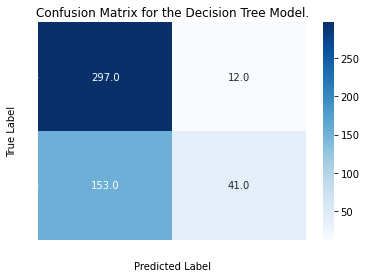

In [27]:
# For further analysis we can use a confusion matrix, to get a better idea of our results. It gives us an insight into the true
# and predicitve classes.

# Create the matrix first.
Confusion_Matrix_DT = confusion_matrix(y_test, y_predictions)

# Use seaborn to plot.
sns.heatmap(Confusion_Matrix_DT, annot = True, cmap = 'Blues', fmt = ".1f")

plt.title('Confusion Matrix for the Decision Tree Model.');
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

plt.gcf().axes[0].tick_params(colors = 'white')

plt.show()

Confusion Matrix Note: Each box denotes the True Positives (Top Left), False Positives (Top Right), False Negatives (Bottom Left), True Negatives (Bottom Right).

2) **K-Nearest Neighbours**

Definition: Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

For More Information: https://analyticsindiamag.com/7-types-classification-algorithms/

Vital Hyperparameters: Value of K => The number of neighbours plays a pivotal role in the learning process of a KNN model.

Note: We have used 3 as our total neighbor value because we get the best accuracy consistently with this value. Further, using K = 3 is also considered as an ideal value and is commonly used in standard practice. 

Further, there do exist methods such as grid search that assist in finding the ideal values of hyperparameters! This process is called hyper tuning parameters.

In [28]:
# Now we simply follow the same procedure as before, to create, run and test this model!

X = Water_Potability_Data.drop('Potability', axis = 1)

y = Water_Potability_Data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

KNN_Model = KNeighborsClassifier(n_neighbors = 3)

KNN_Model.fit(X_train, y_train)

y_predictions = KNN_Model.predict(X_test)

metrics.accuracy_score(y_test, y_predictions)

0.5447316103379721

This is the accuracy score for this model! 

Basically, this means that our model is accurately predicting our potability of the water sample about 56.8% correctly!

In [29]:
# While accuracy is just one metric to evaluate, we can also take a glimpse into other performace metrics such as f1-score etc.
# that assist us in evaluating our model.

# Precision: It answers the following question: What proportion of positive identifications was actually correct?

# Recall: It answers the following question: What proportion of actual positives was identified correctly?

# F1-Score: In a way combines Precision and Recall by taking a weighted average, i.e. their harmonic mean.

print(metrics.classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       298
           1       0.43      0.35      0.38       205

    accuracy                           0.54       503
   macro avg       0.52      0.51      0.51       503
weighted avg       0.53      0.54      0.53       503



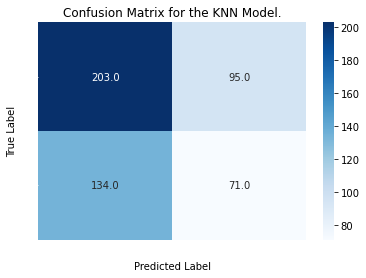

In [30]:
# For further analysis we can use a confusion matrix, to get a better idea of our results. It gives us an insight into the true
# and predicitve classes.

# Create the matrix first.
Confusion_Matrix_KNN = confusion_matrix(y_test, y_predictions)

# Use seaborn to plot.
sns.heatmap(Confusion_Matrix_KNN, annot = True, cmap = 'Blues', fmt = ".1f")

plt.title('Confusion Matrix for the KNN Model.');
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

plt.gcf().axes[0].tick_params(colors = 'white')

plt.show()

3) **Random Forest**

Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

For More Information: https://analyticsindiamag.com/7-types-classification-algorithms/

Vital Hyperparameters: n_estimators (number of trees), max_depth (max depth of each tree) => These play a pivotal role in the learning process of a KNN model.

Note: We have used 64 trees each with a max depth of 4. These values are ideal and considered as standard practice.

Further, there do exist methods such as grid search that assist in finding the ideal values of hyperparameters! This process is called hyper tuning parameters.

In [31]:
# Now we simply follow the same procedure as before, to create, run and test this model!

X = Water_Potability_Data.drop('Potability', axis = 1)

y = Water_Potability_Data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Random_Forest_Model = RandomForestClassifier(n_estimators = 64, max_depth = 4)

Random_Forest_Model.fit(X_train, y_train)

y_predictions = Random_Forest_Model.predict(X_test)

metrics.accuracy_score(y_test, y_predictions)

0.6560636182902585

This is the accuracy score for this model! 

Basically, this means that our model is accurately predicting our potability of the water sample about 66.4% correctly!

In [32]:
# While accuracy is just one metric to evaluate, we can also take a glimpse into other performace metrics such as f1-score etc.
# that assist us in evaluating our model.

# Precision: It answers the following question: What proportion of positive identifications was actually correct?

# Recall: It answers the following question: What proportion of actual positives was identified correctly?

# F1-Score: In a way combines Precision and Recall by taking a weighted average, i.e. their harmonic mean.

print(metrics.classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       324
           1       0.56      0.16      0.25       179

    accuracy                           0.66       503
   macro avg       0.61      0.55      0.51       503
weighted avg       0.63      0.66      0.59       503



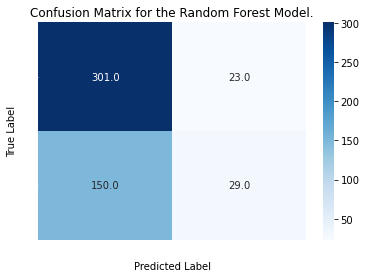

In [33]:
# For further analysis we can use a confusion matrix, to get a better idea of our results. It gives us an insight into the true
# and predicitve classes.

# Create the matrix first.
Confusion_Matrix_RF = confusion_matrix(y_test, y_predictions)

# Use seaborn to plot.
sns.heatmap(Confusion_Matrix_RF, annot = True, cmap = 'Blues', fmt = ".1f")

plt.title('Confusion Matrix for the Random Forest Model.');
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

plt.gcf().axes[0].tick_params(colors = 'white')

plt.show()

Now, comparing our models together, we see that the Decision Tree model has a classification accuracy of 67.2%, the KNN model has an accuracy of 56.8% and the Random Forest has an accuracy of about 66.4%.

While these accuracy reports are relatively low, there are reasonable (rather plausible) explanations for this:

- Having more samples of data with fewer missing values would be more helpful in increasing accuracy scores. 

- In the future, we could probably perform a more detailed way of finding hyperparameters, i.e., hyperparameter tuning and use other common classifiers to train the model.

- We could also implement methods for feature selection to select only the most relevant feature columns for testing.

- More unpotable samples of water could have led to a possible skew that consequently affected the accuracy score.

# Step 5: Conclusion

Going through the data science pipeline on this data set gave us a strong insight into how the variables measuring different metrics of water affect both-each other as well as the potability of water. However, irrespective of our insightful and deep analysis, we were unable to provide a clear culprit that makes water unpotable. At the same time, this this has helped us understand and reflect that determining the potability of water is not an easy task and is a much much more intricate process than we believed it to be.  

On a different note, our analysis indeed did give us a string glimpse into how correlations between relations could be determined. We discovered the many ways to assess correlations through the use of - scatter plots, heatmaps, hypothesis testing - being some of them. 

While we faced a plethora of difficulties this is predominantly due to the absence of metrics in the data, that clearly rule out the potability of water such as toxins like lead and mercury. Potability of water is also impacted by biological factors such as harmful bacteria and toxic organic matter (For More Information: https://www.sciencedirect.com/topics/chemical-engineering/potable-water) that our data does not have. In the same vein, this notion on and around the potability of water is also somewhat subjective in the sense that the standards for water being potable or not vary largely across regions and countries. For that matter, even within the United States, different states have different metrics to determine whether or not water is 'good enough' for people to consume.  

Clearly, the idea around the potability of water is a rather intricate and complex one!